In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
import statsmodels.api as sm
import math
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import projectpro
projectpro.checkpoint('1e808c')
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
#!pip install category_encoders

In [3]:
#!pip install projectpro

In [4]:
data=pd.read_csv("train-2.csv")
data

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,NaN,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,NaN,Medium,Cloudy,121,Special Offer,0.60,487.67


DATA CLEANING

In [5]:
data.shape

(45000, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           45000 non-null  object 
 1   Airline             41427 non-null  object 
 2   Departure_City      44660 non-null  object 
 3   Arrival_City        44814 non-null  object 
 4   Distance            44909 non-null  float64
 5   Departure_Time      45000 non-null  object 
 6   Arrival_Time        45000 non-null  object 
 7   Duration            45000 non-null  float64
 8   Aircraft_Type       44957 non-null  object 
 9   Number_of_Stops     45000 non-null  int64  
 10  Day_of_Week         44775 non-null  object 
 11  Month_of_Travel     44733 non-null  object 
 12  Holiday_Season      35980 non-null  object 
 13  Demand              44683 non-null  object 
 14  Weather_Conditions  44698 non-null  object 
 15  Passenger_Count     45000 non-null  int64  
 16  Prom

In [7]:
data.dtypes

Flight_ID              object
Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [8]:
#DATA TYPE CORRECTION
data["Departure_Time"]=pd.to_datetime(data["Departure_Time"])
data["Arrival_Time"]=pd.to_datetime(data["Arrival_Time"])

C:\Users\elcot\AppData\Local\Temp\ipykernel_2676\55951438.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Departure_Time"]=pd.to_datetime(data["Departure_Time"])
C:\Users\elcot\AppData\Local\Temp\ipykernel_2676\55951438.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_Time"]=pd.to_datetime(data["Arrival_Time"])


In [9]:
data.dtypes

Flight_ID                     object
Airline                       object
Departure_City                object
Arrival_City                  object
Distance                     float64
Departure_Time        datetime64[ns]
Arrival_Time          datetime64[ns]
Duration                     float64
Aircraft_Type                 object
Number_of_Stops                int64
Day_of_Week                   object
Month_of_Travel               object
Holiday_Season                object
Demand                        object
Weather_Conditions            object
Passenger_Count                int64
Promotion_Type                object
Fuel_Price                   float64
Flight_Price                 float64
dtype: object

In [10]:
data["Arrival_Time"].head(10)

0   2023-12-11 20:19:00
1   2023-12-11 01:45:00
2   2023-12-11 15:54:00
3   2023-12-11 01:21:00
4   2023-12-11 06:04:00
5   2023-12-11 10:33:00
6   2023-12-11 21:57:00
7   2023-12-11 22:44:00
8   2023-12-11 13:58:00
9   2023-12-11 17:01:00
Name: Arrival_Time, dtype: datetime64[ns]

In [11]:
#CHECK NULL VALUES
data.isnull().sum()

Flight_ID                 0
Airline                3573
Departure_City          340
Arrival_City            186
Distance                 91
Departure_Time            0
Arrival_Time              0
Duration                  0
Aircraft_Type            43
Number_of_Stops           0
Day_of_Week             225
Month_of_Travel         267
Holiday_Season         9020
Demand                  317
Weather_Conditions      302
Passenger_Count           0
Promotion_Type        15215
Fuel_Price               90
Flight_Price              0
dtype: int64

In [12]:
data["Airline"].fillna(data["Airline"].mode()[0],inplace=True)
#fill missing value in categorical column with mode
catagorical_column=["Departure_City","Arrival_City","Aircraft_Type","Day_of_Week","Month_of_Travel","Holiday_Season","Demand","Weather_Conditions","Promotion_Type"]
for column in catagorical_column:
    data[column].fillna(data[column].mode()[0],inplace=True)
#fill missing values in numerical column with mean, meidean
numerical_column=["Distance","Fuel_Price"]
for column in numerical_column:
    data[column].fillna(data[column].mean(),inplace=True)

In [13]:
data.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In [14]:
percentage_missing=data.isnull().sum()*100/len(data)
missing_values=pd.DataFrame({"percentage_missing":percentage_missing})
missing_values.sort_values(by="percentage_missing",ascending=True)
# missing_values

,percentage_missing
Flight_ID,0.0
Promotion_Type,0.0
Passenger_Count,0.0
Weather_Conditions,0.0
Demand,0.0
Holiday_Season,0.0
Month_of_Travel,0.0
Day_of_Week,0.0
Fuel_Price,0.0
Number_of_Stops,0.0


In [15]:
data["Promotion_Type"].unique()

array(['Special Offer', 'Discount'], dtype=object)

In [16]:
data["Promotion_Type"].value_counts()

Promotion_Type
Special Offer    30111
Discount         14889
Name: count, dtype: int64

In [17]:
data["Month_of_Travel"].value_counts()

Month_of_Travel
January      4110
October      3812
April        3776
July         3755
November     3749
September    3731
March        3727
August       3712
December     3700
June         3672
May          3658
February     3598
Name: count, dtype: int64

In [18]:
data["Weather_Conditions"].value_counts()

Weather_Conditions
Cloudy    11711
Snow      11148
Rain      11093
Clear     11048
Name: count, dtype: int64

In [19]:
data["Demand"].value_counts()

Demand
Low       29263
Medium     8954
High       6783
Name: count, dtype: int64

In [20]:
data["Day_of_Week"].value_counts()

Day_of_Week
Sunday       6697
Saturday     6418
Friday       6414
Monday       6407
Wednesday    6406
Tuesday      6336
Thursday     6322
Name: count, dtype: int64

In [21]:
data["Holiday_Season"].value_counts()

Holiday_Season
Spring    18056
Fall       9010
Summer     8970
Winter     8964
Name: count, dtype: int64

In [22]:
data["Arrival_City"].value_counts()


Arrival_City
North Michael       235
Port Michael         47
Lake Michael         42
New Michael          35
Michaelmouth         35
                   ... 
Summerland            1
North Lindafurt       1
West Waynetown        1
North Keithmouth      1
Gabrielville          1
Name: count, Length: 23479, dtype: int64

In [23]:
data["Departure_City"].value_counts()

Departure_City
Port Michael         389
West Michael          47
North Michael         42
South Michael         40
North David           39
                    ... 
New Jordanchester      1
North Morgan           1
North Mindy            1
Mcmillanberg           1
East Patriciafurt      1
Name: count, Length: 23187, dtype: int64

In [24]:
data["Airline"].value_counts()

Airline
Airline A    17436
Airline C    13809
Airline B    13755
Name: count, dtype: int64

In [25]:
data["Airline"].mode()

0    Airline A
Name: Airline, dtype: object

In [26]:
data["Aircraft_Type"].value_counts()

Aircraft_Type
Airbus A320    9154
Boeing 777     9059
Boeing 787     8952
Airbus A380    8943
Boeing 737     8892
Name: count, dtype: int64

In [27]:
data["Number_of_Stops"].value_counts()

Number_of_Stops
1    22287
0    20157
3     2556
Name: count, dtype: int64

In [28]:
data.drop(columns=["Departure_Time","Arrival_Time","Flight_ID"],inplace=True)

In [29]:
data.describe()

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,5482.238727,7.852555,0.665667,174.928822,0.850192,574.606270
std,2592.222795,3.292880,0.750578,72.372980,0.201535,160.239344
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3233.000000,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5482.238727,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7720.000000,10.650000,1.000000,238.000000,1.020000,679.692500
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


In [30]:
q3=data["Distance"].quantile(0.75)
q1=data["Distance"].quantile(0.25)
iqr=q3-q1
up=q3+(1.5*iqr)
lp=q1-(1.5*iqr)
up,lp

(14450.5, -3497.5)

In [31]:
q3=data["Duration"].quantile(0.75)
q1=data["Duration"].quantile(0.25)
iqr=q3-q1
up=q3+(1.5*iqr)
lp=q1-(1.5*iqr)
up,lp

(19.065, -3.375000000000001)

In [32]:
q3=data["Number_of_Stops"].quantile(0.75)
q1=data["Number_of_Stops"].quantile(0.25)
iqr=q3-q1
up=q3+(1.5*iqr)
lp=q1-(1.5*iqr)
up,lp

(2.5, -1.5)

In [33]:
# data["Number_of_Stops"]=data["Number_of_Stops"].clip(up,lp)

In [34]:
q3=data["Passenger_Count"].quantile(0.75)
q1=data["Passenger_Count"].quantile(0.25)
iqr=q3-q1
up=q3+(1.5*iqr)
lp=q1-(1.5*iqr)
up,lp

(427.0, -77.0)

In [35]:
q3=data["Fuel_Price"].quantile(0.75)
q1=data["Fuel_Price"].quantile(0.25)
iqr=q3-q1
up=q3+(1.5*iqr)
lp=q1-(1.5*iqr)
up,lp

(1.53, 0.17000000000000004)

In [36]:
q3=data["Flight_Price"].quantile(0.75)
q1=data["Flight_Price"].quantile(0.25)
iqr=q3-q1
up=q3+(1.5*iqr)
lp=q1-(1.5*iqr)
up,lp

(1016.2850000000003, 118.70499999999987)

In [37]:
data["Flight_Price"]=data["Flight_Price"].clip(lp,up)

In [38]:
data.describe()

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,5482.238727,7.852555,0.665667,174.928822,0.850192,574.245398
std,2592.222795,3.292880,0.750578,72.372980,0.201535,159.132539
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3233.000000,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5482.238727,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7720.000000,10.650000,1.000000,238.000000,1.020000,679.692500
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1016.285000


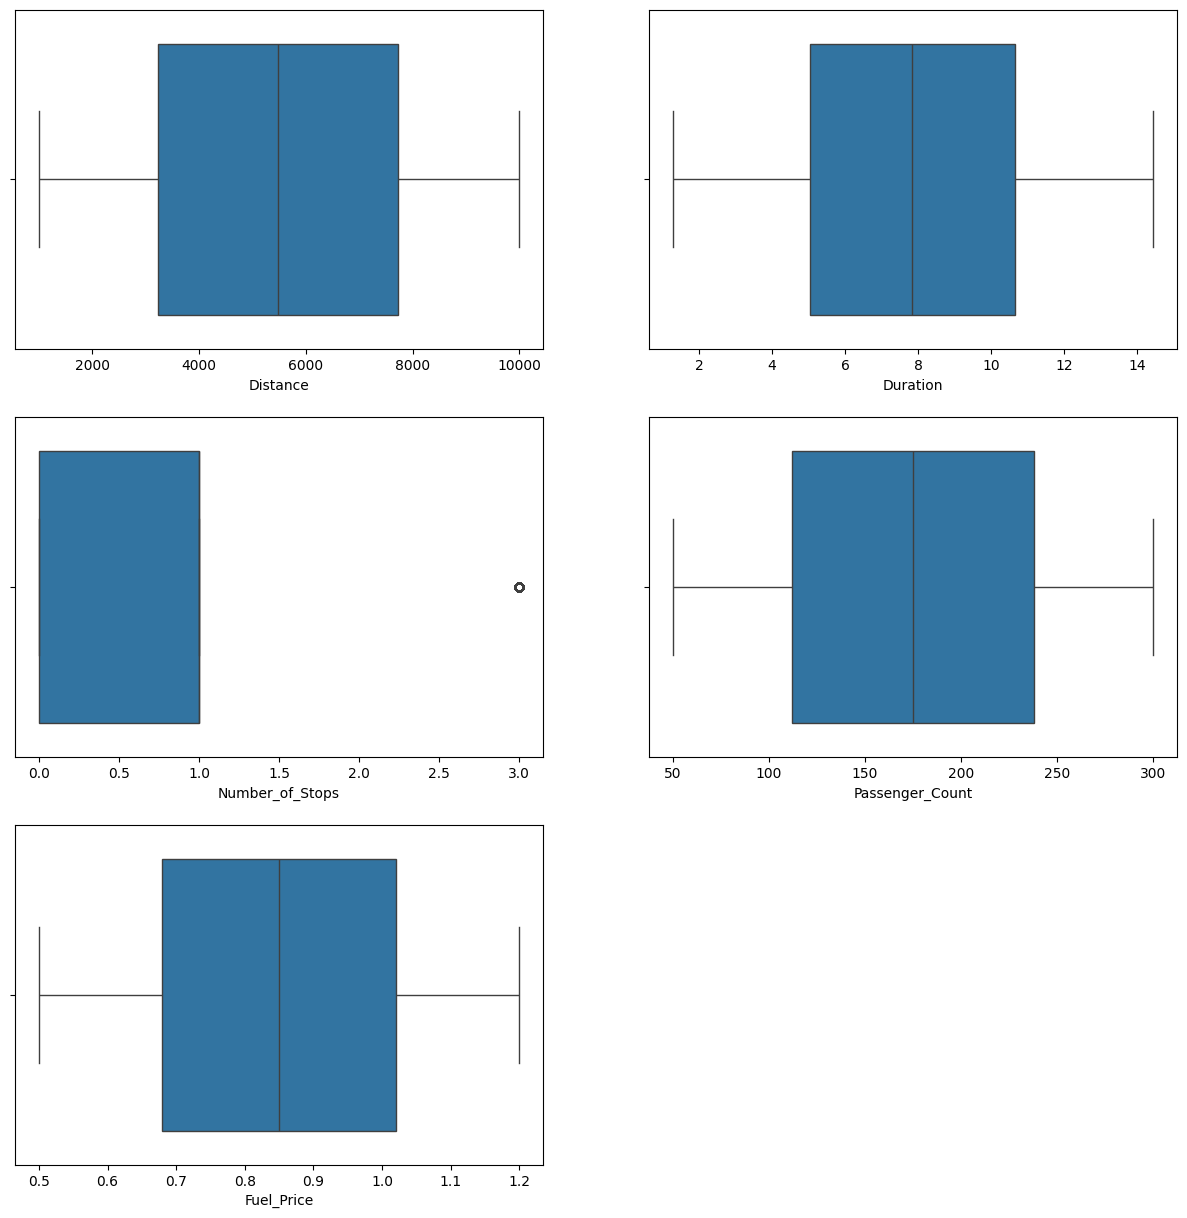

In [39]:
n=1
cols=["Distance","Duration","Number_of_Stops","Passenger_Count","Fuel_Price","Flight_Price"]
plt.figure(figsize=(15,15))
for i in cols:
    if n<=5:
        plt.subplot(3,2,n);
        n+=1
        sns.boxplot(x=data[i])
        plt.xlabel(i)
        

EDA

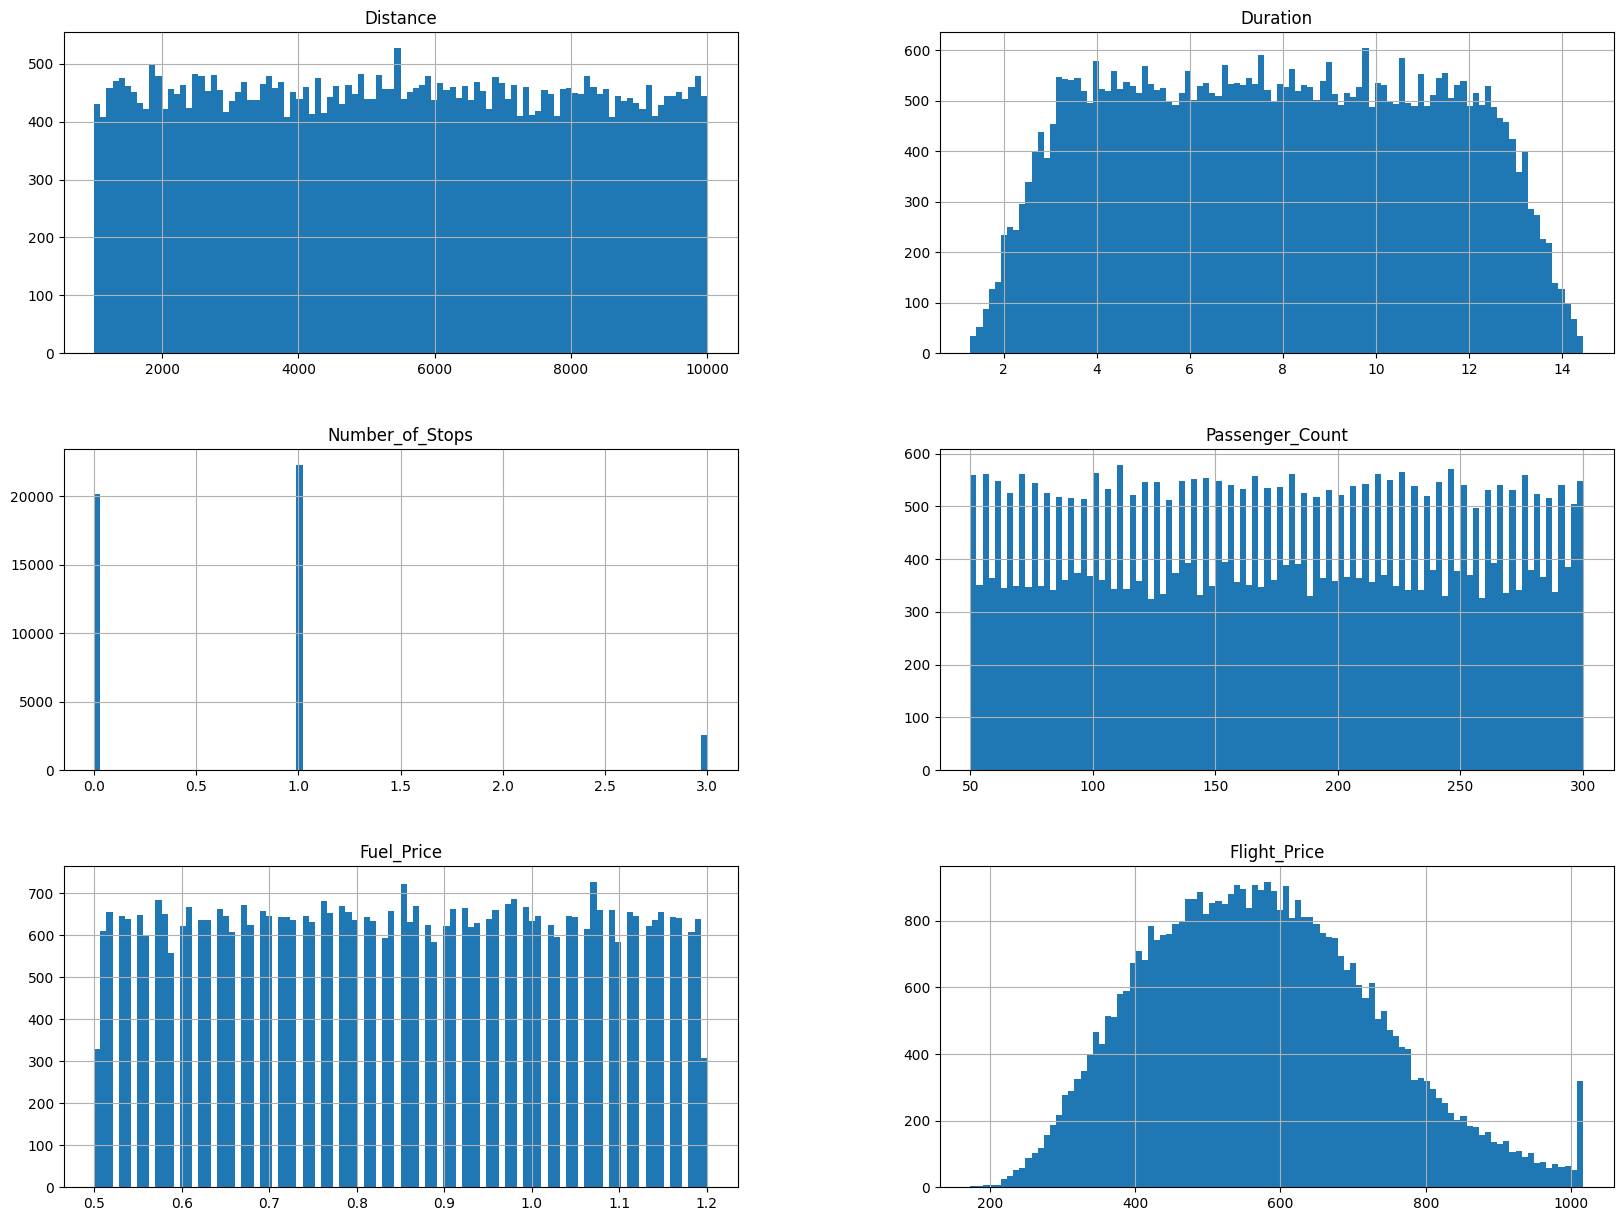

In [40]:
data.hist(bins=100, figsize=(20,15))
plt.show()

In [41]:
cat_column=data.select_dtypes(include=["object"]).columns.tolist()
int_column=data.select_dtypes(include=["int64"]).columns.tolist()
float_column=data.select_dtypes(include=["float64"]).columns.tolist()
cat_column,int_column,float_column

(['Airline',
  'Departure_City',
  'Arrival_City',
  'Aircraft_Type',
  'Day_of_Week',
  'Month_of_Travel',
  'Holiday_Season',
  'Demand',
  'Weather_Conditions',
  'Promotion_Type'],
 ['Number_of_Stops', 'Passenger_Count'],
 ['Distance', 'Duration', 'Fuel_Price', 'Flight_Price'])

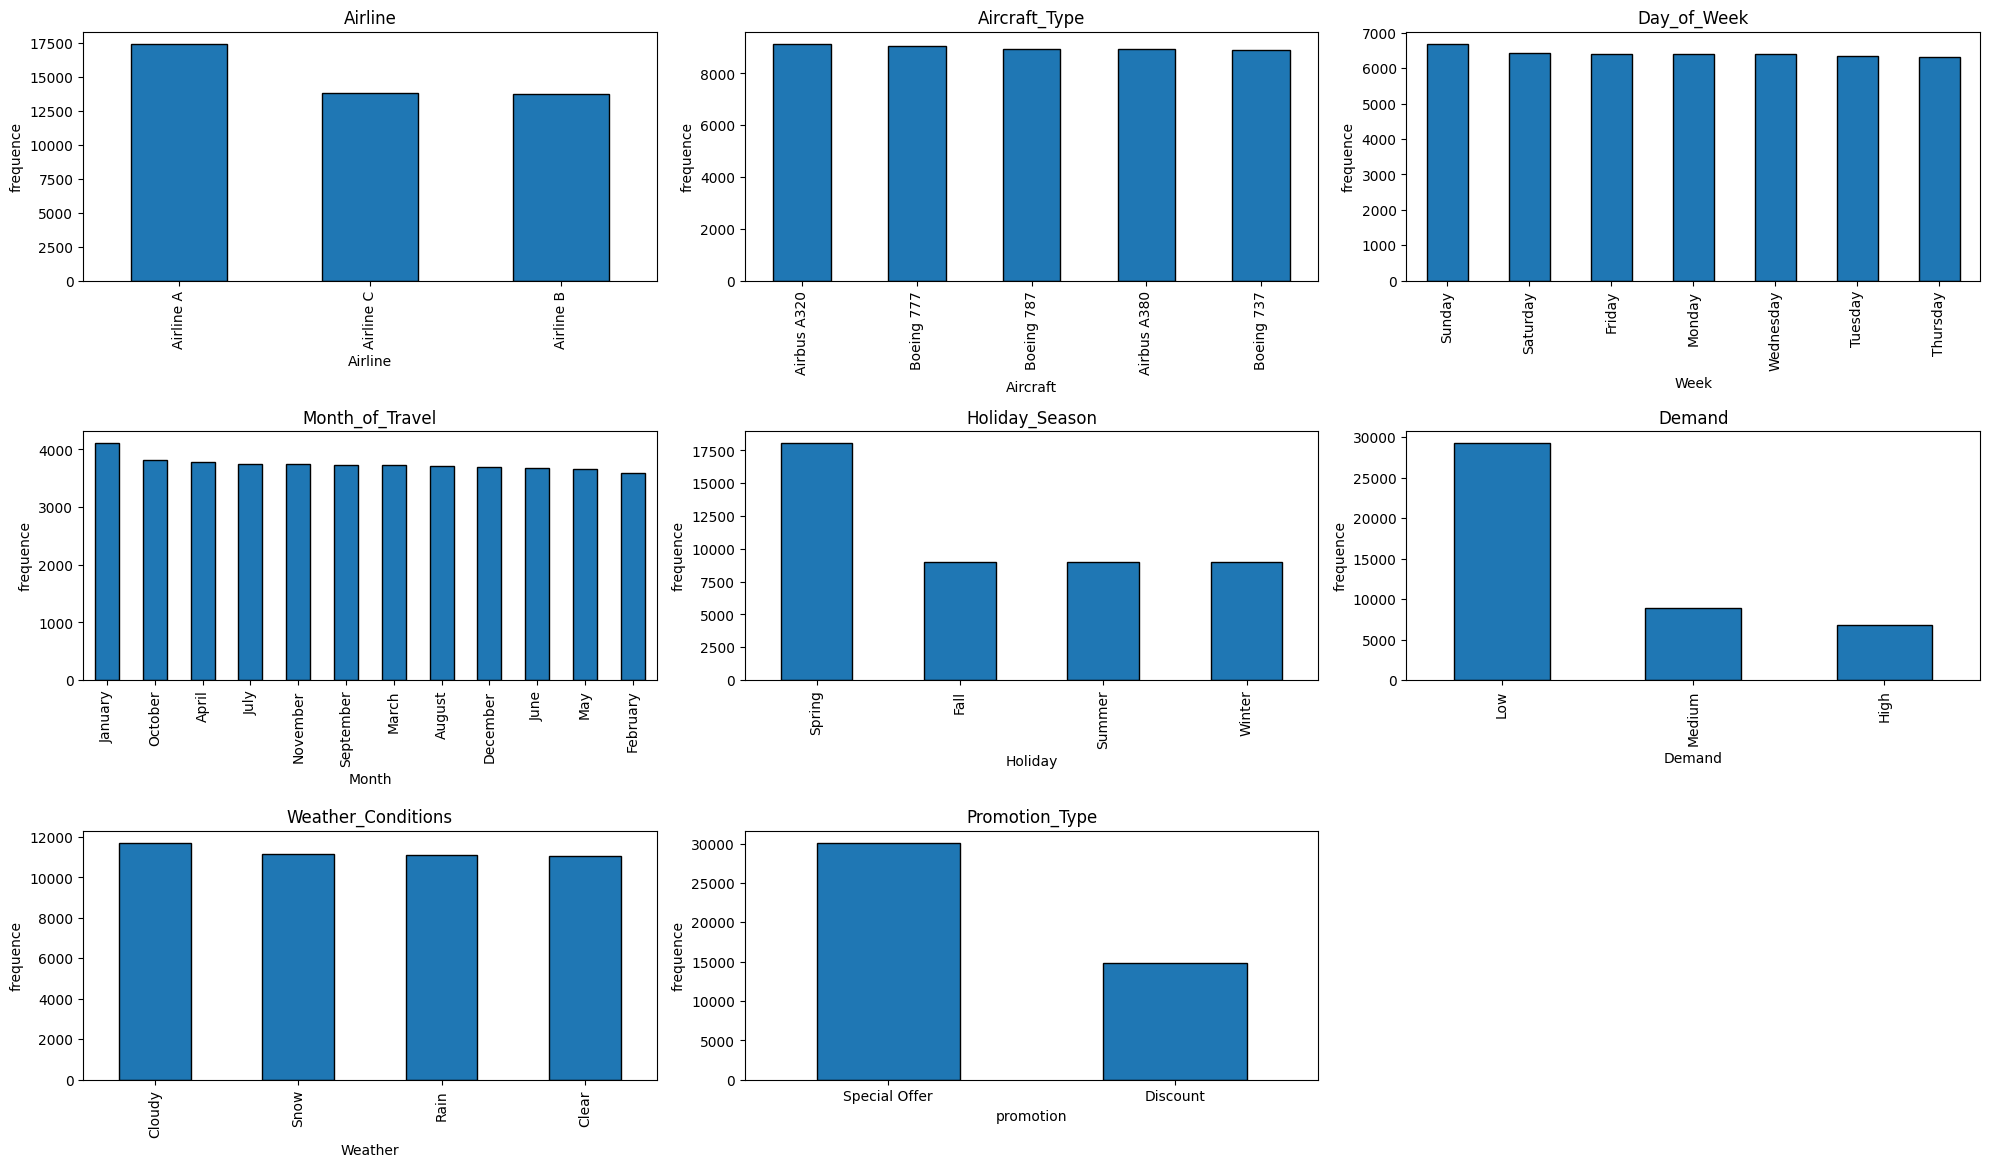

In [42]:
 import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
# plt.figure(figsize=(20,25))

plt.subplot(431)
data["Airline"].value_counts().sort_values(ascending=False).plot(kind="bar",edgecolor="k")
plt.title("Airline")
plt.xlabel("Airline")
plt.ylabel("frequence")


plt.subplot(432)
data["Aircraft_Type"].value_counts().sort_values(ascending=False).plot(kind="bar",edgecolor="k")
plt.title("Aircraft_Type")
plt.xlabel("Aircraft")
plt.ylabel("frequence")


plt.subplot(433)
data["Day_of_Week"].value_counts().sort_values(ascending=False).plot(kind="bar",edgecolor="k")
plt.title("Day_of_Week")
plt.xlabel("Week")
plt.ylabel("frequence")


plt.subplot(434)
data["Month_of_Travel"].value_counts().sort_values(ascending=False).plot(kind="bar",edgecolor="k")
plt.title("Month_of_Travel")
plt.xlabel("Month")
plt.ylabel("frequence")


plt.subplot(435)
data["Holiday_Season"].value_counts().sort_values(ascending=False).plot(kind="bar",edgecolor="k")
plt.title("Holiday_Season")
plt.xlabel("Holiday")
plt.ylabel("frequence")


plt.subplot(436)
data["Demand"].value_counts().sort_values(ascending=False).plot(kind="bar",edgecolor="k")
plt.title("Demand")
plt.xlabel("Demand")
plt.ylabel("frequence")


plt.subplot(437)
data["Weather_Conditions"].value_counts().sort_values(ascending=False).plot(kind="bar",edgecolor="k")
plt.title("Weather_Conditions")
plt.xlabel("Weather")
plt.ylabel("frequence")


plt.subplot(438)
data["Promotion_Type"].value_counts().sort_values(ascending=False).plot(kind="bar",edgecolor="k")
plt.title("Promotion_Type")
plt.xlabel("promotion")
plt.ylabel("frequence")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

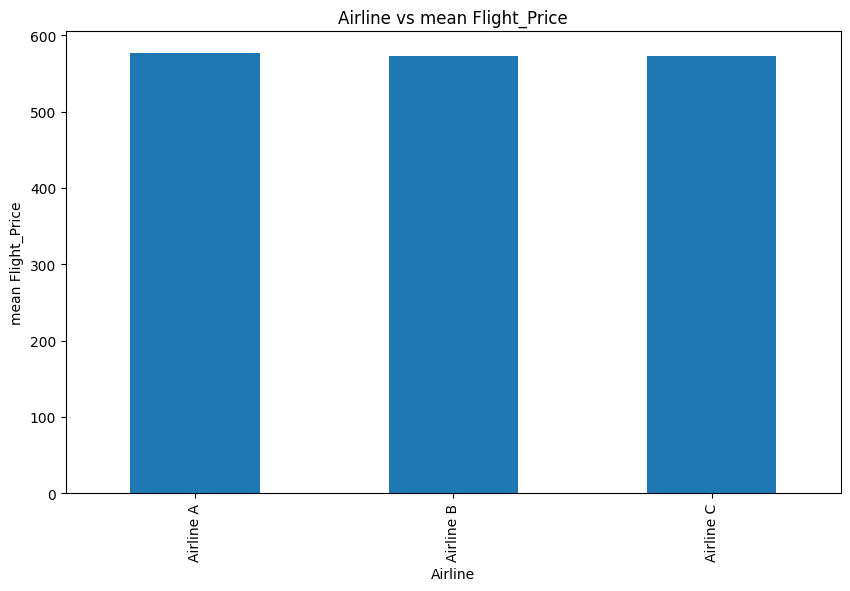

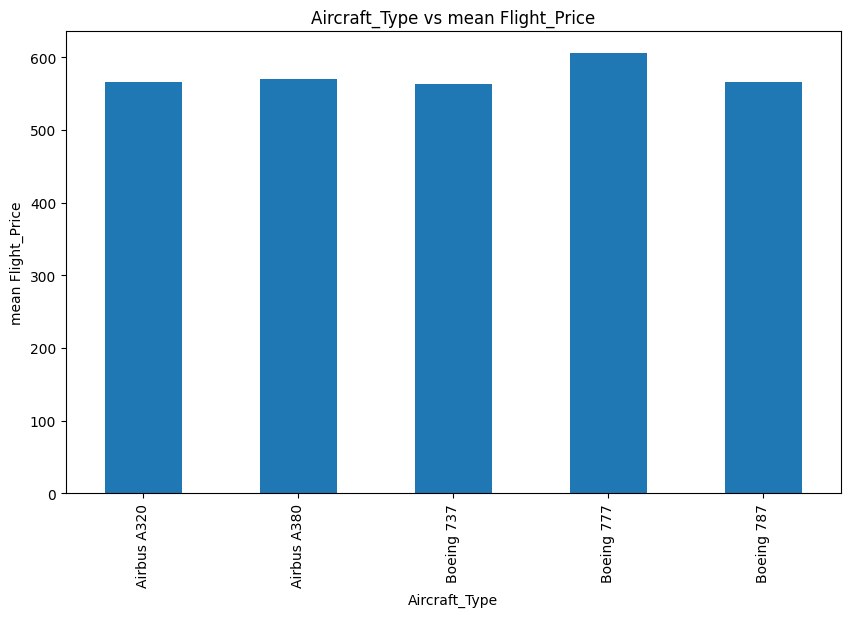

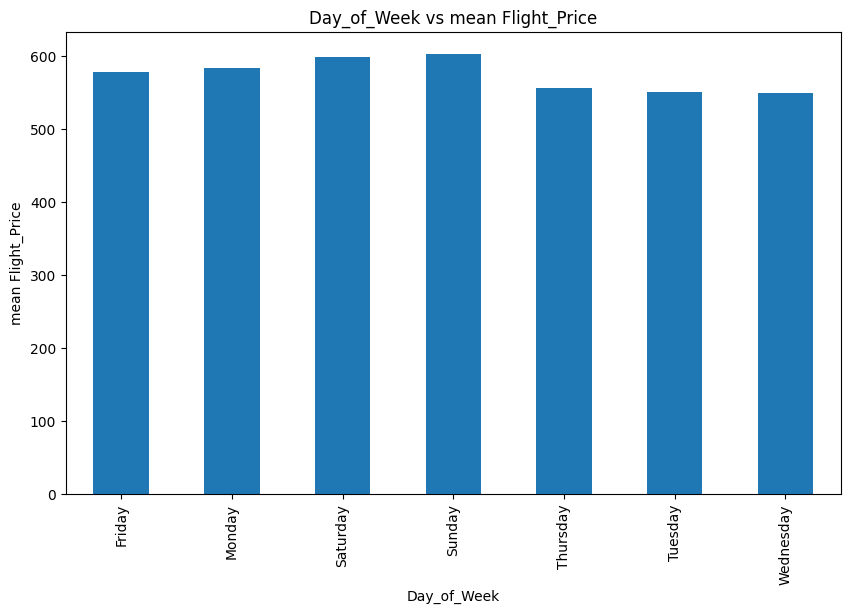

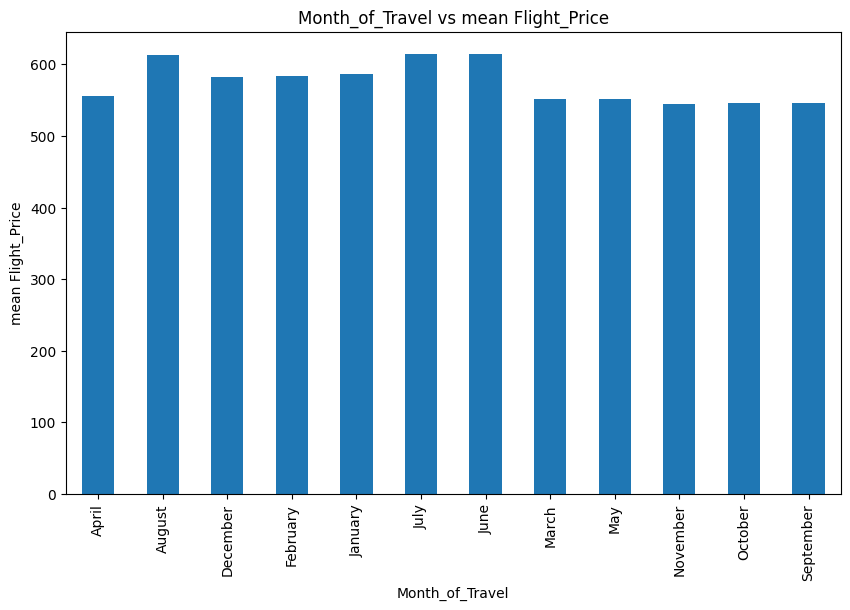

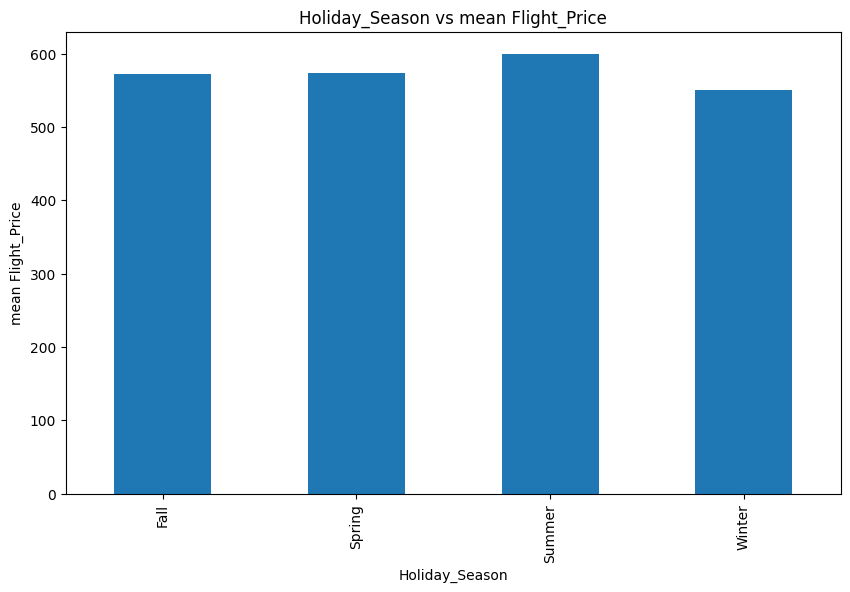

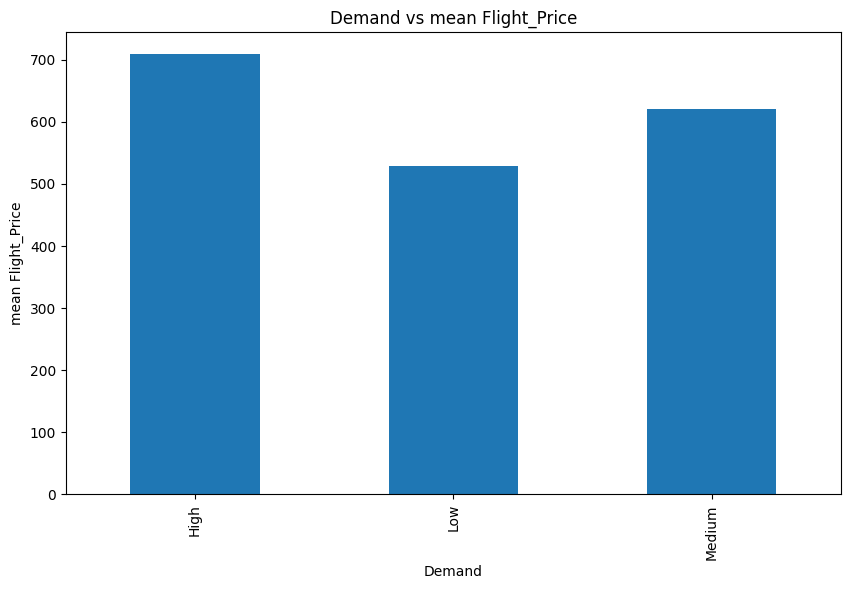

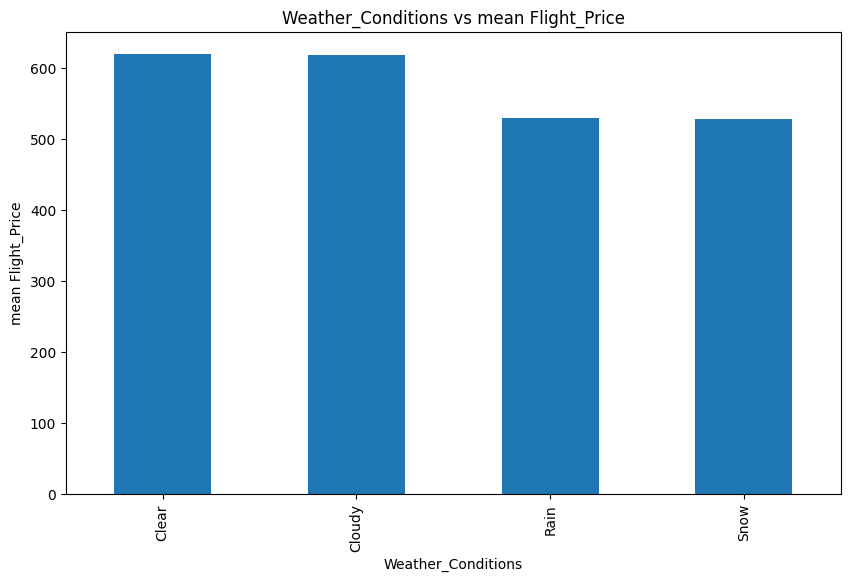

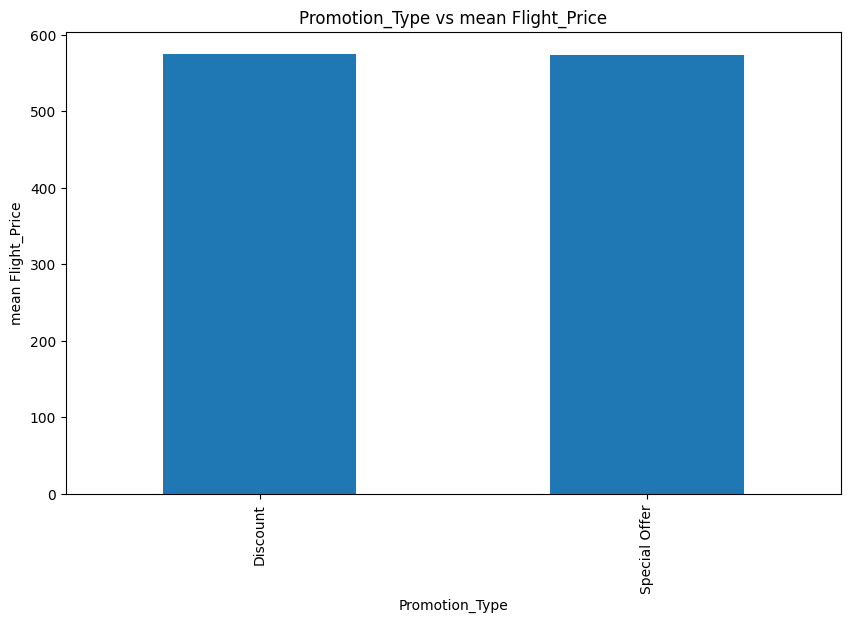

In [43]:
#future and target plot comparing
features=['Airline',
  'Aircraft_Type',
  'Day_of_Week',
  'Month_of_Travel',
  'Holiday_Season',
  'Demand',
  'Weather_Conditions',
  'Promotion_Type']
for feature in features:
    plt.figure(figsize=(10, 6))
    if data[feature].dtype != "object":
        plt.scatter(data[feature], data["Flight_Price"], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel("Flight_price")
        plt.title(f"{feature} vs Flight_price")
    else:
        data.groupby(feature)["Flight_Price"].mean().plot(kind="bar")
        plt.xlabel(feature)
        plt.ylabel("mean Flight_Price")
        plt.title(f"{feature} vs mean Flight_Price")
    plt.show()

In [44]:
# data["Aircraft_Type"].value_counts().sort_index().plot(kind="bar", edgecolor="k")
# plt.xlabel("Aircraft")
# plt.ylabel("frequnce")
# plt.title("AR")
# plt.show()

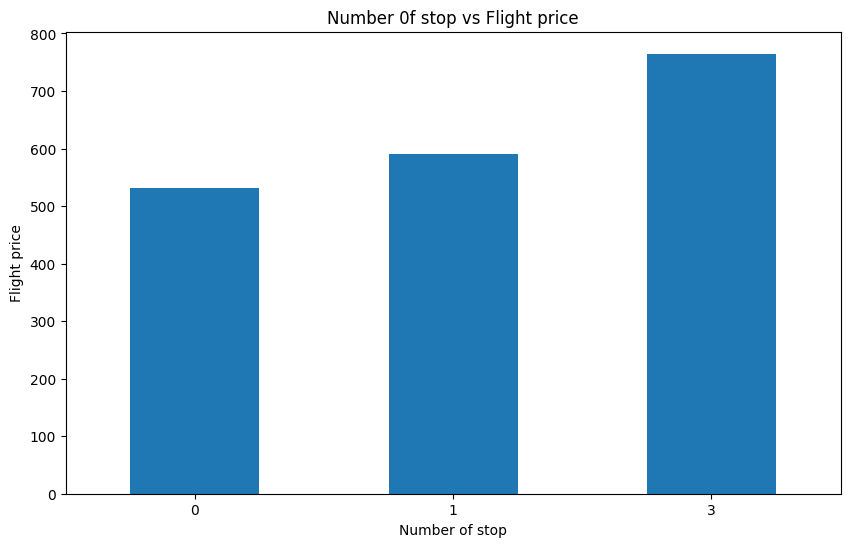

In [45]:
#plot using number of stop and flight price
airline=data.groupby("Number_of_Stops")["Flight_Price"].mean()
airline = airline.sort_values(ascending=True)
plt.figure(figsize=(10,6))
airline.plot(kind="bar")
plt.title("Number 0f stop vs Flight price")
plt.xlabel("Number of stop")
plt.ylabel("Flight price")
plt.xticks(rotation=0)
plt.show()       

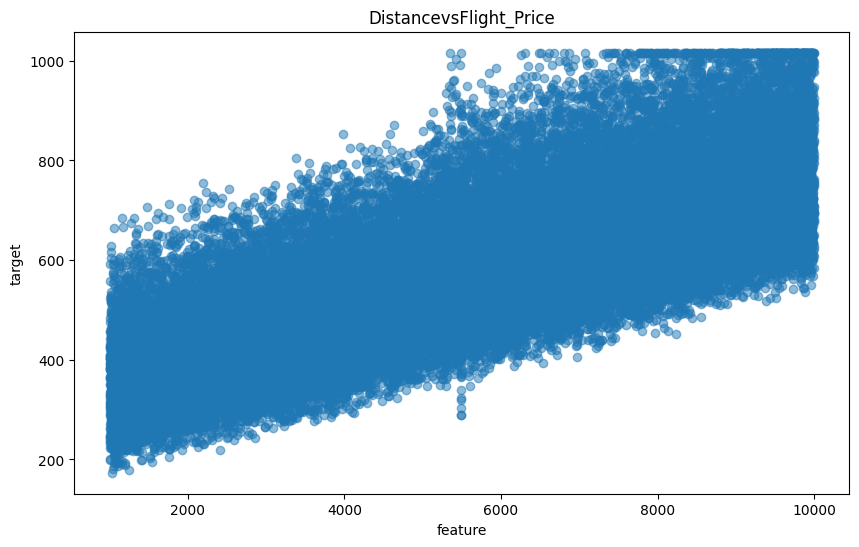

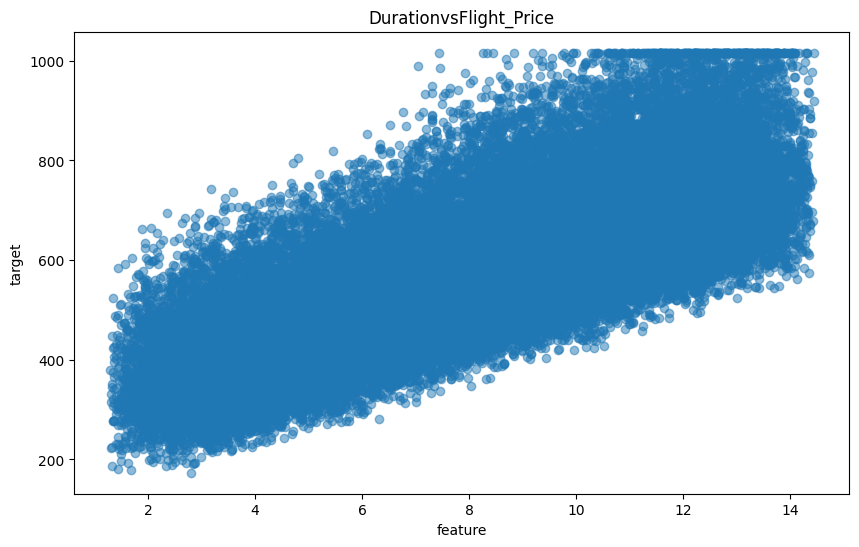

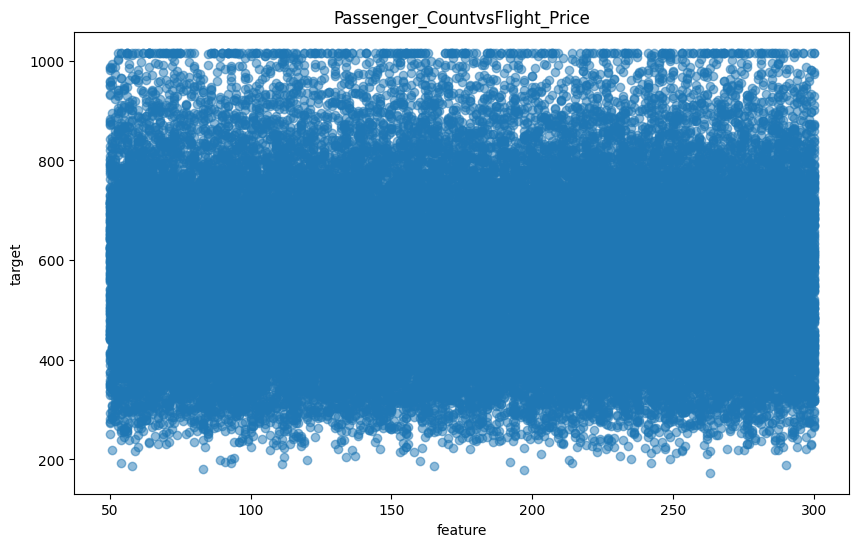

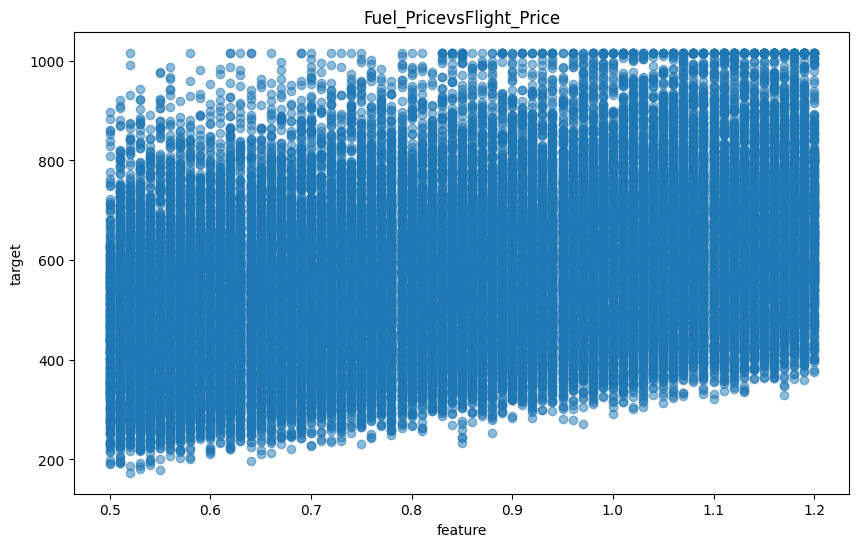

In [46]:
#ploting with continous features and target
features=["Distance","Duration","Passenger_Count","Fuel_Price"]
target="Flight_Price"
for feature in features:
    plt.figure(figsize=(10,6))
    plt.scatter(data[feature],data[target],alpha=0.5)
    plt.xlabel("feature")
    plt.ylabel("target")
    plt.title(f'{feature}vs{target}')
    plt.show()
        
                


In [47]:
data

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,Airline B,Port Michael,Greenshire,8286.0,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,Special Offer,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,Spring,Low,Clear,181,Special Offer,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,6.21,Boeing 737,0,Saturday,June,Spring,Medium,Cloudy,121,Special Offer,0.60,487.67


In [48]:
df=data.copy()

ENCODING CATEGORICAL VARIABLE


In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder

In [50]:
label_encoder=LabelEncoder()

In [51]:
df['Airline'].value_counts()

Airline
Airline A    17436
Airline C    13809
Airline B    13755
Name: count, dtype: int64

In [52]:
# ENODING WITH LABEL ENCODING
ordinal_cols=["Day_of_Week","Month_of_Travel","Holiday_Season","Demand","Promotion_Type"]
label_encoder=LabelEncoder()
for col in ordinal_cols:
    df[col]=label_encoder.fit_transform(df[col])
df.head()


,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,Airline B,Port Michael,Greenshire,8286.0,11.94,Boeing 787,0,6,2,2,1,Rain,240,1,0.91,643.93
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,6,7,1,1,Rain,107,1,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,3,11,2,0,Cloudy,131,1,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,3,3,0,1,Cloudy,170,0,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,4,4,1,1,Clear,181,1,1.09,804.35


In [53]:
df.columns

Index(['Airline', 'Departure_City', 'Arrival_City', 'Distance', 'Duration',
       'Aircraft_Type', 'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel',
       'Holiday_Season', 'Demand', 'Weather_Conditions', 'Passenger_Count',
       'Promotion_Type', 'Fuel_Price', 'Flight_Price'],
      dtype='object')

In [54]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# Select categorical columns to one-hot encode
categorical_columns = ["Airline","Aircraft_Type","Weather_Conditions"]

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(df[categorical_columns])

# Get the column names for the encoded features
encoded_columns = encoder.get_feature_names_out(input_features=categorical_columns)

# Create DataFrame with encoded values
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
encoded_df = encoded_df.astype(int)
# Drop original categorical columns from the DataFrame
df = df.drop(categorical_columns, axis=1)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

C:\Users\elcot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
from category_encoders import LeaveOneOutEncoder
looe_encoder=LeaveOneOutEncoder(cols=["Departure_City","Arrival_City"])
df=looe_encoder.fit_transform(df, df["Flight_Price"])

In [56]:
pd.set_option('display.max_columns', 500)
df

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,565.422796,509.385000,8286.0,11.94,0,6,2,2,1,240,1,0.91,643.93,1,0,0,0,0,1,0,1,0
1,574.245398,575.873333,2942.0,5.29,0,6,7,1,1,107,1,1.08,423.13,0,1,0,0,0,0,0,1,0
2,574.245398,574.245398,2468.0,4.41,1,3,11,2,0,131,1,0.52,442.17,1,0,0,0,0,1,1,0,0
3,516.070000,574.245398,3145.0,4.96,0,3,3,0,1,170,0,0.71,394.42,0,0,0,0,0,1,1,0,0
4,529.299412,574.245398,5558.0,8.09,1,4,4,1,1,181,1,1.09,804.35,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,809.850000,768.770000,3884.0,5.70,1,3,8,0,1,263,0,0.69,417.18,1,0,0,0,0,1,0,0,0
44996,574.245398,574.245398,9191.0,12.97,1,0,2,0,1,168,0,0.74,687.03,0,0,0,0,0,0,0,0,1
44997,605.580000,448.145000,6757.0,8.81,1,6,10,0,1,244,1,0.83,547.39,0,1,0,0,1,0,0,0,1
44998,611.033333,574.245398,3587.0,6.21,0,2,6,1,2,121,1,0.60,487.67,1,0,0,1,0,0,1,0,0


SPLITING

In [57]:
X= df.drop('Flight_Price',axis=1)
Y=df["Flight_Price"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=60)

In [58]:
print(len(Y_train))
print(len(Y_test))

36000
9000


SCALING

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled,X_test_scaled

(array([[ 0.92618161, -1.10417565,  0.80032861, ..., -0.59287735,
         -0.5708923 , -0.57585343],
        [ 0.00849692,  0.00729633,  0.79415791, ...,  1.68668951,
         -0.5708923 , -0.57585343],
        [ 0.92385117, -1.09311512,  1.38808805, ..., -0.59287735,
         -0.5708923 ,  1.73655299],
        ...,
        [-0.83399265, -0.23810167, -1.18085265, ..., -0.59287735,
         -0.5708923 ,  1.73655299],
        [-2.24011968,  0.00729633,  0.3946049 , ..., -0.59287735,
         -0.5708923 ,  1.73655299],
        [ 0.2297104 ,  0.00729633,  0.13697806, ..., -0.59287735,
         -0.5708923 , -0.57585343]]),
 array([[-0.63880646,  0.00729633,  0.2804469 , ..., -0.59287735,
          1.75164389, -0.57585343],
        [ 1.84803446,  0.00729633, -1.10603288, ..., -0.59287735,
          1.75164389, -0.57585343],
        [-0.05581157,  0.82706179, -1.63362797, ...,  1.68668951,
         -0.5708923 , -0.57585343],
        ...,
        [ 0.00849692, -0.03814507,  1.03095863, ...,  

MODEL FITTING

In [60]:
# pip install xgboost

In [61]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)
xgregressor=XGBRegressor()
xgregressor.fit(X_train,Y_train)
y_pred=xgregressor.predict(X_test)

In [62]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [63]:
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
    xgb_regressor=xgb.XGBRegressor(learning_rate=lr,n_estimators=100)
    xgb_regressor.fit(X_train,Y_train)
    print("Learning rate :", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,Y_train,cv=15).mean())
    cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,Y_train,cv=15).mean())

Learning rate : 0.01 cross_val_score: 0.7895269897649523
Learning rate : 0.05 cross_val_score: 0.9876819765628351
Learning rate : 0.08 cross_val_score: 0.9906589535631782
Learning rate : 0.1 cross_val_score: 0.9908372147950693
Learning rate : 0.2 cross_val_score: 0.990172508166215
Learning rate : 0.25 cross_val_score: 0.9897552700194439
Learning rate : 0.3 cross_val_score: 0.9894071936236275


In [64]:
cross_val_xgb_regressor=max(cross_val_xgb)
cross_val_xgb_regressor

0.9908372147950693

In [65]:
print("The best learning rate is 0.1 and cross_val_score is:", cross_val_xgb_regressor)

The best learning rate is 0.1 and cross_val_score is: 0.9908372147950693


IMPLEMENTING EXTREME GRADIENT BOOSTING REGRESSION

In [66]:
xgb_regressor = xgb.XGBRegressor(learning_rate=0.1, n_estimators=100)
xgb_regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [67]:
Y_pred=xgb_regressor.predict(X_train)
Y_pred

array([535.0945 , 279.4641 , 522.1205 , ..., 738.0576 , 681.7755 ,
       565.52954], dtype=float32)

In [68]:
print(len(Y_pred))

36000


In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, random_state=42)
gbr.fit(X_train,Y_train)
print(gbr.score(X_train,Y_train))
print(gbr.score(X_test,Y_test))

0.9875011826392434
0.9872980072289008


R2 SCORE FOR EXTREME GRADIENT BOOSTING REGRESSION

In [70]:
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
# Create and fit your XGBoost model
model = XGBRegressor()
model.fit(X_train, Y_train)

# Generate predictions on the test set
Y_pred = model.predict(X_test)

# Calculate R2 score
R2_score_xgb = r2_score(Y_test, Y_pred)

In [72]:
print("R score for Extreme=Gradient Boosting Regression Model:", R2_score_xgb)

R score for Extreme=Gradient Boosting Regression Model: 0.9900700551329026


RMSE

In [73]:
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error (RMSE):",rmse)

Root Mean Squared Error (RMSE): 16.083900314645078


FEATURE_IMPOTANCES

In [74]:
xgb_regressor.feature_importances_

array([3.68588022e-04, 2.80337525e-04, 3.27101260e-01, 2.38434747e-01,
       7.15039000e-02, 2.40726750e-02, 2.41931435e-02, 1.80497082e-04,
       2.00449944e-01, 2.79161613e-04, 1.45101920e-04, 1.09823264e-01,
       1.85040393e-04, 1.11391048e-04, 1.92522770e-04, 1.47557934e-04,
       2.34888983e-04, 1.66629732e-04, 6.20953680e-04, 6.31625240e-04,
       8.76857608e-04], dtype=float32)

In [75]:
ftImp=list(zip(xgb_regressor.feature_importances_, data.columns[:-1]))
imp=pd.DataFrame(ftImp, columns=["Importance","Featrue"])
imp.sort_values("Importance",ascending=False,inplace=True)
imp

,Importance,Featrue
2,0.327101,Arrival_City
3,0.238435,Distance
8,0.200450,Month_of_Travel
11,0.109823,Weather_Conditions
4,0.071504,Duration
6,0.024193,Number_of_Stops
5,0.024073,Aircraft_Type
0,0.000369,Airline
1,0.000280,Departure_City
9,0.000279,Holiday_Season


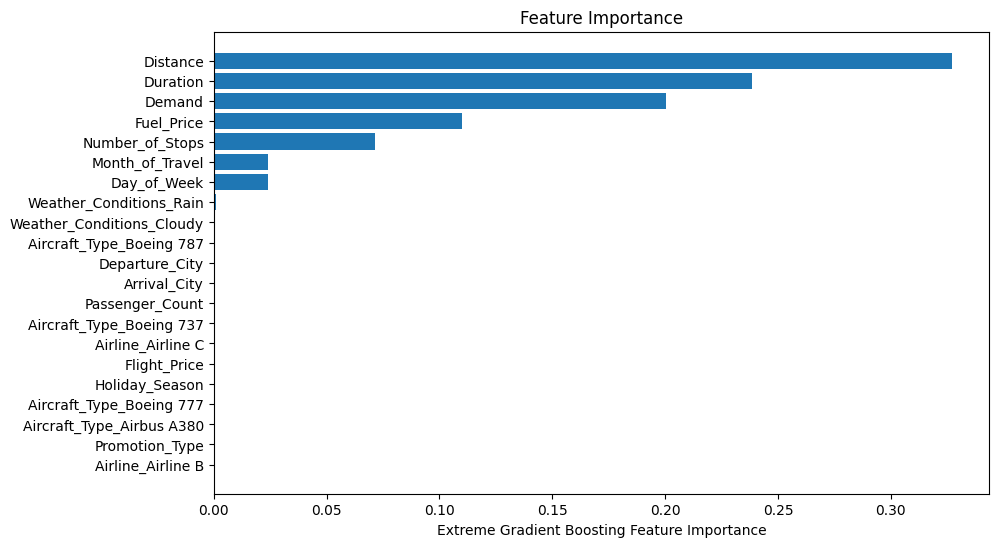

In [76]:
sorted_idx=xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,6))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

In [77]:
test=pd.read_csv("test.csv")

In [78]:
test.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,0:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,NaN,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,1:16,13:04,11.80,Airbus A380,1,Thursday,April,NaN,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,NaN,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,0:11,10:23,10.21,Airbus A380,0,Thursday,March,NaN,Low,Rain,223,NaN,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,3:22,5:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           5000 non-null   object 
 1   Airline             4573 non-null   object 
 2   Departure_City      4961 non-null   object 
 3   Arrival_City        4970 non-null   object 
 4   Distance            4991 non-null   float64
 5   Departure_Time      5000 non-null   object 
 6   Arrival_Time        5000 non-null   object 
 7   Duration            5000 non-null   float64
 8   Aircraft_Type       4992 non-null   object 
 9   Number_of_Stops     5000 non-null   int64  
 10  Day_of_Week         4975 non-null   object 
 11  Month_of_Travel     4966 non-null   object 
 12  Holiday_Season      4013 non-null   object 
 13  Demand              4966 non-null   object 
 14  Weather_Conditions  4951 non-null   object 
 15  Passenger_Count     5000 non-null   int64  
 16  Promot

In [80]:
test.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price'],
      dtype='object')

In [81]:
test.shape

(5000, 18)

In [82]:
test.isnull().sum()

Flight_ID                0
Airline                427
Departure_City          39
Arrival_City            30
Distance                 9
Departure_Time           0
Arrival_Time             0
Duration                 0
Aircraft_Type            8
Number_of_Stops          0
Day_of_Week             25
Month_of_Travel         34
Holiday_Season         987
Demand                  34
Weather_Conditions      49
Passenger_Count          0
Promotion_Type        1689
Fuel_Price              10
dtype: int64

In [83]:
test['Airline'].fillna(test['Airline'].mode()[0],inplace=True)

In [84]:
test.Departure_City.value_counts()

Departure_City
Lake Michael        9
Smithmouth          7
Matthewmouth        7
Port Michael        7
Port Michelle       7
                   ..
New Mollyside       1
Christinaberg       1
South Taylorport    1
Hebertfort          1
Perrymouth          1
Name: count, Length: 4273, dtype: int64

In [85]:
test["Departure_City"].fillna(test["Departure_City"].mode()[0],inplace=True)
test["Arrival_City"].fillna(test["Arrival_City"].mode()[0],inplace=True)
test["Distance"].fillna(test["Distance"].median(),inplace=True)
test["Day_of_Week"].fillna(test["Day_of_Week"].mode()[0],inplace=True)
test["Month_of_Travel"].fillna(test["Month_of_Travel"].mode()[0],inplace=True)
test["Demand"].fillna(test["Demand"].mode()[0],inplace=True)
test["Weather_Conditions"].fillna(test["Weather_Conditions"].mode()[0],inplace=True)
test["Promotion_Type"].fillna(test["Promotion_Type"].mode()[0],inplace=True)
test["Holiday_Season"].fillna(test["Holiday_Season"].mode()[0],inplace=True)
test["Aircraft_Type"].fillna(test["Aircraft_Type"].mode()[0],inplace=True)
test["Fuel_Price"].fillna(test["Fuel_Price"].median(),inplace=True)

In [86]:
test.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
dtype: int64

In [87]:
test["Aircraft_Type"].value_counts()

Aircraft_Type
Boeing 737     1047
Boeing 777     1001
Airbus A320    1000
Boeing 787      986
Airbus A380     966
Name: count, dtype: int64

In [88]:
test["Airline"].value_counts()

Airline
Airline A    1978
Airline C    1532
Airline B    1490
Name: count, dtype: int64

In [89]:
test["Weather_Conditions"].value_counts()

Weather_Conditions
Clear     1326
Rain      1245
Cloudy    1218
Snow      1211
Name: count, dtype: int64

In [90]:
columns_to_drop=["Flight_ID","Departure_Time","Arrival_Time"]
test.drop(columns_to_drop, axis=1,inplace=True)

In [91]:
#ENCODING WITH LABEL ENCODING
ordinal_cols=["Day_of_Week","Month_of_Travel","Holiday_Season","Demand","Promotion_Type"]
label_encoder=LabelEncoder()
for col in ordinal_cols:
    test[col]=label_encoder.fit_transform(test[col])

In [92]:
# Select categorical columns to one-hot encode
categorical_columns = ["Airline","Aircraft_Type","Weather_Conditions"]

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(test[categorical_columns])

# Get the column names for the encoded features
encoded_columns = encoder.get_feature_names_out(input_features=categorical_columns)

# Create DataFrame with encoded values
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
encoded_df = encoded_df.astype(int)
# Drop original categorical columns from the DataFrame
test = test.drop(categorical_columns, axis=1)

# Concatenate the original DataFrame with the encoded DataFrame
test = pd.concat([test, encoded_df], axis=1)

C:\Users\elcot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [93]:
#ONE OUT ENCODING
from category_encoders import LeaveOneOutEncoder
looe_encoder=LeaveOneOutEncoder(cols=["Departure_City","Arrival_City"])
test=looe_encoder.fit_transform(test, test["Distance"])

In [94]:
pd.set_option('display.max_columns', 500)
test

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,4834.000000,5460.7206,3096.0,5.52,1,2,1,2,2,110,1,0.95,1,0,0,1,0,0,0,0,0
1,5460.720600,5460.7206,8760.0,11.80,1,4,0,3,0,295,0,1.05,0,0,1,0,0,0,0,0,0
2,5460.720600,5460.7206,6365.0,9.59,1,3,4,3,1,223,0,0.63,0,1,0,0,1,0,0,1,0
3,5460.720600,5460.7206,7836.0,10.21,0,4,7,3,1,223,1,0.88,0,0,1,0,0,0,0,1,0
4,5460.720600,5460.7206,1129.0,1.86,1,2,1,2,0,145,1,1.11,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8579.000000,5975.0000,9389.0,12.35,1,5,7,3,0,143,1,0.51,1,0,0,0,1,0,1,0,0
4996,5330.468085,5460.7206,7718.0,11.55,1,0,11,1,1,55,1,0.50,0,0,0,0,0,0,0,1,0
4997,5460.720600,5460.7206,2597.0,4.93,1,0,11,0,1,145,0,0.55,0,1,1,0,0,0,0,0,1
4998,5460.720600,5460.7206,4659.0,7.71,1,0,1,0,0,163,1,0.79,1,0,1,0,0,0,1,0,0


In [95]:
test

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,4834.000000,5460.7206,3096.0,5.52,1,2,1,2,2,110,1,0.95,1,0,0,1,0,0,0,0,0
1,5460.720600,5460.7206,8760.0,11.80,1,4,0,3,0,295,0,1.05,0,0,1,0,0,0,0,0,0
2,5460.720600,5460.7206,6365.0,9.59,1,3,4,3,1,223,0,0.63,0,1,0,0,1,0,0,1,0
3,5460.720600,5460.7206,7836.0,10.21,0,4,7,3,1,223,1,0.88,0,0,1,0,0,0,0,1,0
4,5460.720600,5460.7206,1129.0,1.86,1,2,1,2,0,145,1,1.11,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8579.000000,5975.0000,9389.0,12.35,1,5,7,3,0,143,1,0.51,1,0,0,0,1,0,1,0,0
4996,5330.468085,5460.7206,7718.0,11.55,1,0,11,1,1,55,1,0.50,0,0,0,0,0,0,0,1,0
4997,5460.720600,5460.7206,2597.0,4.93,1,0,11,0,1,145,0,0.55,0,1,1,0,0,0,0,0,1
4998,5460.720600,5460.7206,4659.0,7.71,1,0,1,0,0,163,1,0.79,1,0,1,0,0,0,1,0,0


In [96]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=Y_train, enable_categorical=True)
test = xgb.DMatrix(data=test, enable_categorical=True)

In [97]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(test)

In [98]:
def custom_round(x):
    round_value=round(x*100)
    return round_value/100

In [99]:
Y_pred1=np.vectorize(custom_round)(y_pred)
Y_pred1

array([625.05, 909.18, 561.63, ..., 344.26, 739.06, 569.11])

In [100]:
print(len(Y_pred))

9000


In [101]:
submission = pd.read_csv("test.csv")
predicted_flight_price=pd.DataFrame({"Flight_ID":submission["Flight_ID"],"Flight_Price":Y_pred1})

In [102]:
predicted_flight_price.to_csv("submission.csv",index=False)

In [103]:
Submission=pd.read_csv("submission.csv")
Submission

,Flight_ID,Flight_Price
0,F45001,625.05
1,F45002,909.18
2,F45003,561.63
3,F45004,544.50
4,F45005,658.90
...,...,...
4995,F49996,783.15
4996,F49997,541.47
4997,F49998,344.26
4998,F49999,739.06
